In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import arviz as az

In [2]:
az.style.use('arviz-white')

# Visual diagnostics

We will discuss:

* Trace plots
* Autocorrelation plots
* Rank plots

## Trace plots

<br>

    az.plot_trace()

MCMC samples should not be sensitive to the starting point, so if you sample more than one chain (starting from different places) you should essentially get the _same_ distribution within certain small error.
As we already discussed in the numerical diagnostic section, MCMC samples should have the lowest possible autocorrelation 

Trace plots can help diagnose:

* Bad intialization
* Difficult topologies (such as Neal's funnel)
* Multimodal posteriors

## Pathological traces

The following figure shows examples of problematic samples:

<center><img src="../img/pathological_traces.png" width=600></center>

On the first row we see that the MCMC chains has large autocorrelation, you can see the trace (right column) shows long regions of monoticity (the lines parallel to the x-axis). This could be a consequence of a multimodal posterior with barrier between modes of very low probability. Thus the samples has trouble to freely  move from mode to mode. Another explanation could be high correlation between parameters, this can also be problematic for some samplers specially Metropolis. In such cases the multimodality could be _apparent_ and not a real feature of our posterior.

On the second row we see two chains that started from two very different position and eventually converge to the same distribution. The first $\approx$ few samples could bias our results so we can just remove them (*burn-in*).

On the last row, we see two chains exploring two different regions of the parameter space. From the trace it seems they are in fact approaching each other at a slow rate and the maybe eventually reach the same stationary distribution if we increase the number of draws from the posterior. Nevertheless this may be too costly, so a more efficient solution could be to check for problems in the model or maybe change the sampler parameters.

## Autocorrelation plot

<br>

    az.plot_autocorr()

As we discussed in the Numerical Diagnostics section, we can see autocorrelation as a factor that decrease the actual amount of information contained in a sample. So we want to reduce autocorrelation as much as possible.

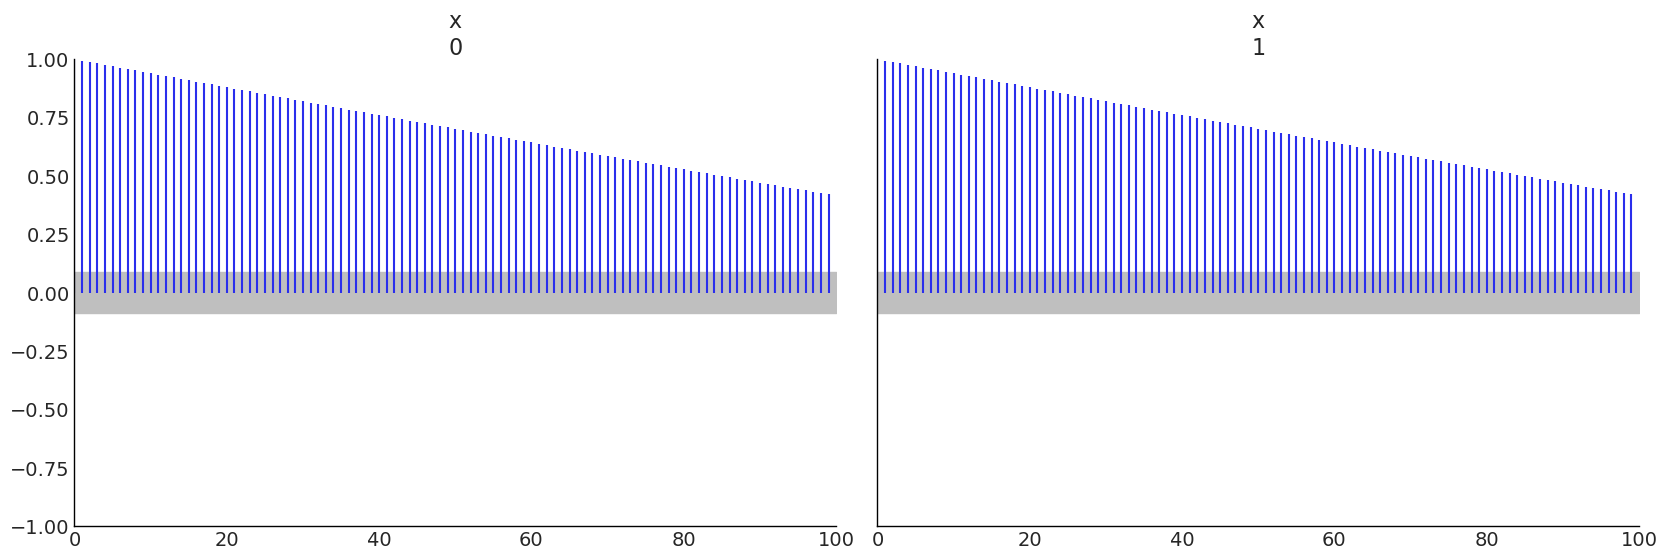

In [3]:
bad_chains = np.linspace(0, 1, 1000).reshape(2, -1)
az.plot_autocorr(bad_chains);

The autocorrelation plot shows the _degree of autocorrelation_ by default it used a maximum window of 100. The previous figure, corresponding to `bad_chains` show a very high autocorrelation while the next figure corresponding to `good_chains` show a very low autocorrelation.

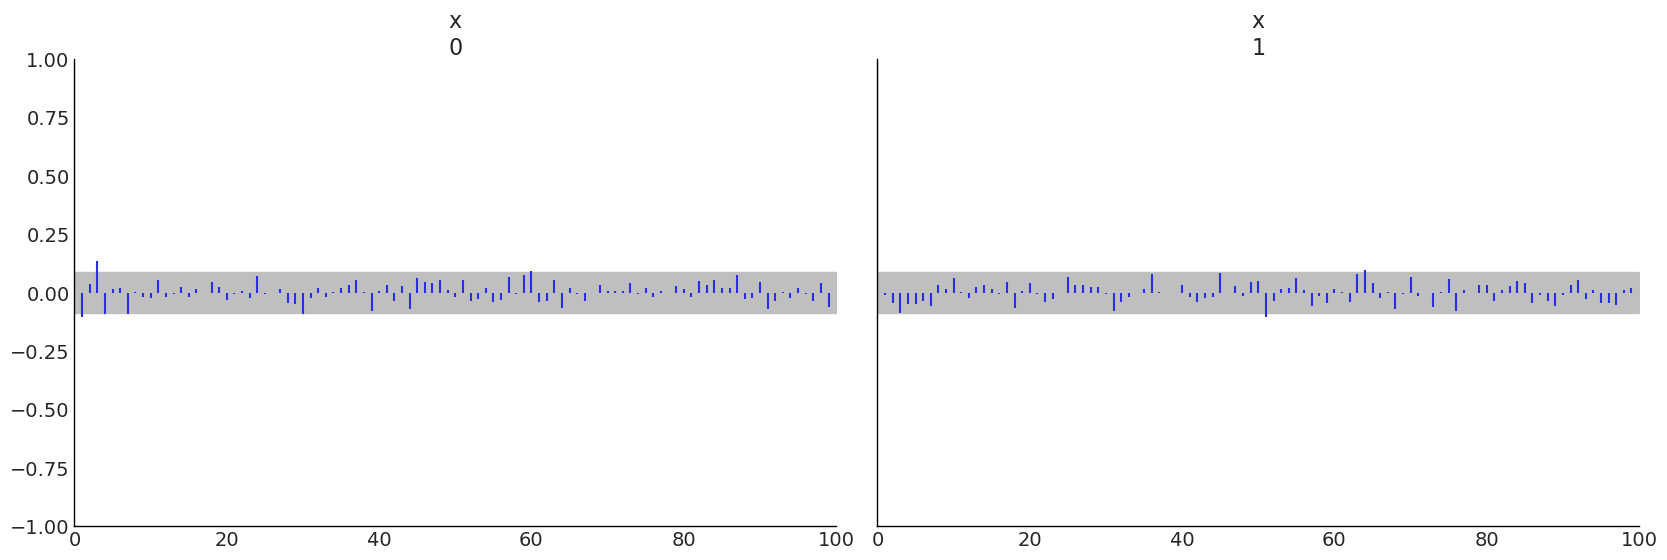

In [4]:
good_chains = stats.uniform.rvs(0, 1, size=(2, 500))
az.plot_autocorr(good_chains);

## Rank plot

<br>

    az.plot_rank()


Rank plots are histograms of the ranked posterior draws, ranked over all chains and then plotted separately for each chain. The idea behind this plot is that if all of the chains are targeting the same posterior, we expect the ranks in each chain to be uniform. Additionally, if rank plots of all chains look similar, this indicates good mixing of the chains

This is a [recently](https://arxiv.org/abs/1903.08008) proposed visual test, author argue superiority over trace plots:

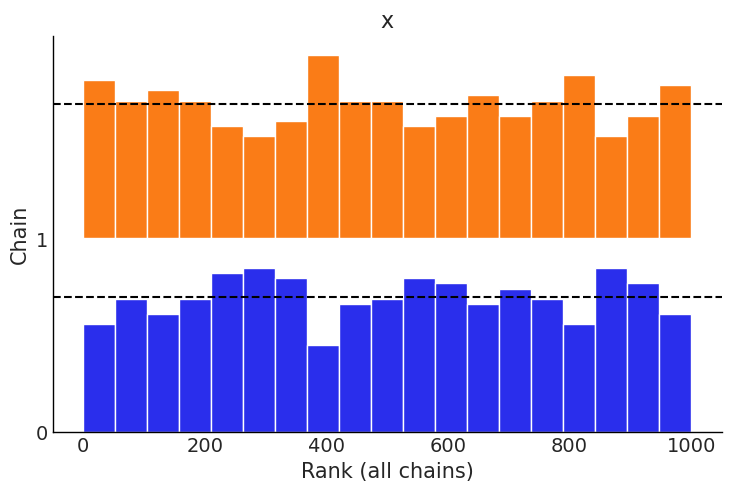

In [5]:
az.plot_rank(good_chains);

We can see that for the `good_chains` the histogram of the ranks is more or less uniform, uniformity will increasing with the sample size, and we can also see that both chains look similar with not distinctive pattern. This is in clear contrast  the results for the `bad_chains`, while they are uniform both chains are exploring two separate set of values. Notice how this is consistent to the way we create `bad_chains`, 1000 ordered number from 0 to 1 split in two halves.

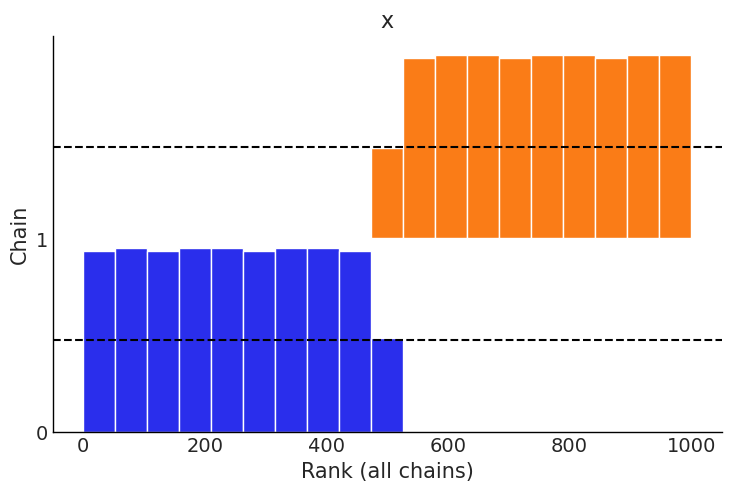

In [6]:
az.plot_rank(bad_chains);

The following is a snippet so you can get a better intuition of how to interpret rank plots. Notice that `az.plot_rank` is doing a more involved computation, but to get intuition this block of code should be enough. Here the histogram of the rank (right panel) is rotated with respect to the previous histogram to match the cumulative distribution on the left panel. So you can see the bottom bar on the right contains the first 100 values from the cumulative distribution on the left, the second bar the second 100 values and so on. 

You can see a rank plot as a device for detecting an excess of any given number, try for example uncommenting the line before and see how and excess of zeros affects the rank plot.

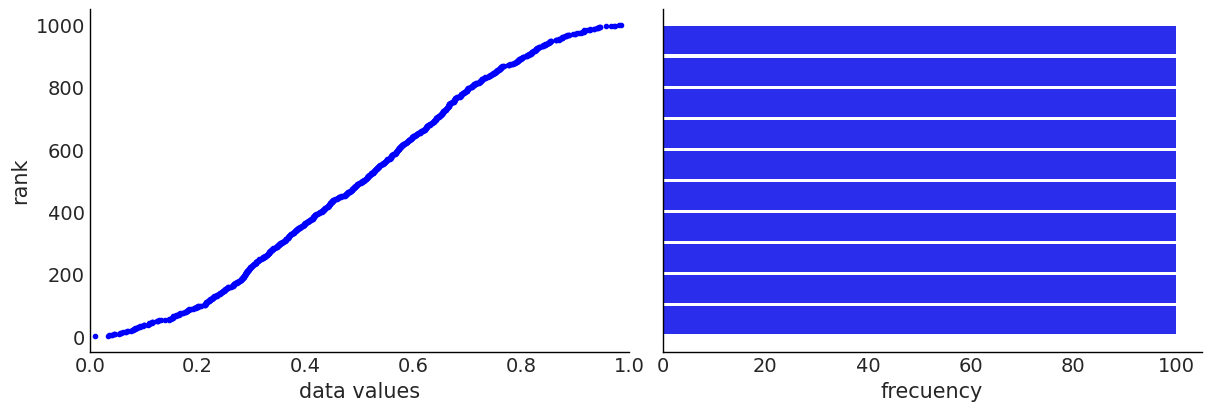

In [7]:
original_data = np.random.beta(2, 2, 1000)
#original_data[:100] = 0
ranked_data = stats.rankdata(original_data)

_, ax = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
ax[0].plot(original_data, ranked_data, 'b.')
ax[0].set_xlabel('data values')
ax[0].set_ylabel('rank')
ax[0].set_xlim([0, 1])
ax[1].hist(ranked_data, bins=10, rwidth=0.9, orientation='horizontal')
ax[1].set_xlabel('frecuency');